In [2]:
from ipynb.fs.full.CovidReceptorExpressionAnalysis_Functions import *
from scipy.stats import chi2_contingency

# Comparing ACE2 expression between groups stratified by 5-year EFS and OS

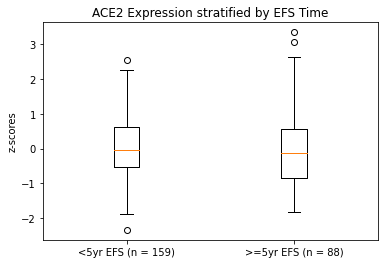

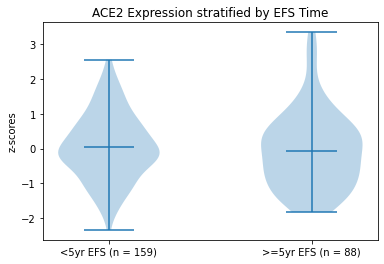

<5yr EFS: median = -0.0515, mean = 0.046434591194968525, 95% CI = (-0.10105743512139821, 0.19392661751133528)
>=5yr EFS: median = -0.12664999999999998, mean = -0.0629102272727273, 95% CI = (-0.2915242846064088, 0.1657038300609542)
Ttest_indResult(statistic=0.8205950529549947, pvalue=0.41267465489830224)


In [3]:
EFS_groups = stratifyNumericalPatientData('EFS Time', 1825) #1825 days = 5yrs
compareExpression('ACE2', EFS_groups,'EFS Time','<5yr EFS','>=5yr EFS')

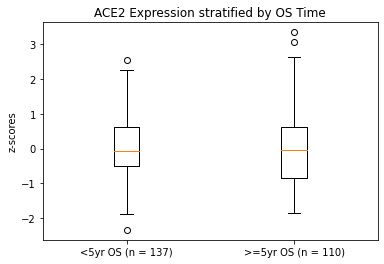

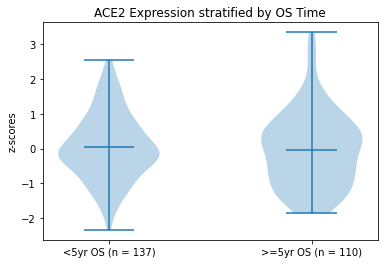

<5yr OS: median = -0.0694, mean = 0.04446277372262772, 95% CI = (-0.11370598669090096, 0.2026315341361564)
>=5yr OS: median = -0.0465, mean = -0.03858545454545455, 95% CI = (-0.2389811217051639, 0.16181021261425482)
Ttest_indResult(statistic=0.6464752214411249, pvalue=0.51857677108747)


In [4]:
OS_groups = stratifyNumericalPatientData('Overall Survival Days', 1825) #1825 days = 5yrs
compareExpression('ACE2', OS_groups,'OS Time','<5yr OS','>=5yr OS')

### Summary
Although there is no statistically significant difference between mean ACE2 expression in good survival versus bad survival groups, there is a clear difference in z-score distribution between the two groups. For both EFS and OS, good survival groups have a larger proportion of negative z-scores, suggesting that ACE2 underexpression is correlated with good survival.

# Comparing ACE2 expression between patients diagnosed at <18 months and patients diagnosed at >=18 months 

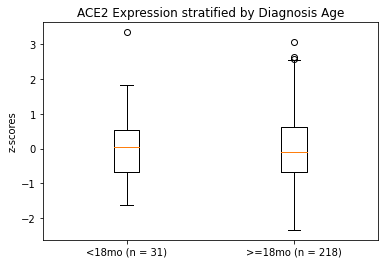

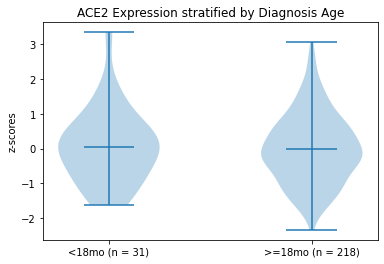

<18mo: median = 0.0338, mean = 0.05105161290322581, 95% CI = (-0.320918657264738, 0.4230218830711896)
>=18mo: median = -0.0948, mean = -0.007260550458715606, 95% CI = (-0.1395192536872913, 0.12499815276986008)
Ttest_indResult(statistic=0.30261991553572504, pvalue=0.7624342257821504)


In [5]:
Age_groups = stratifyNumericalPatientData('Diagnosis Age (days)', 540) #540 days ~ 18 months
compareExpression('ACE2', Age_groups,'Diagnosis Age','<18mo','>=18mo')

### Summary
There is no statistically significant difference in ACE2 expression between patients diagnosed at <18 months of age and patients diagnosed at >18 months of age. The violin plots show different shapes, but this appears largely due to the <18 month group having a smaller range of negative z-scores. This discrepancy might be due to the smaller sample size of the <18 group. Otherwise, the violin plot distributions are very similar.

# Comparing ACE2 expression between MYCN non-amplified and MYCN amplified patients

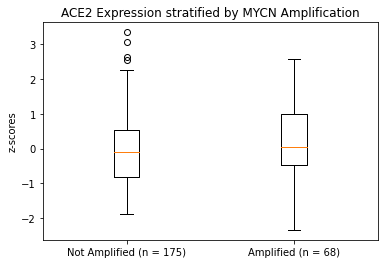

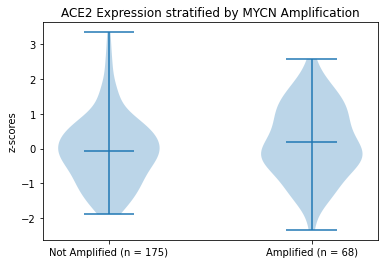

Not Amplified: median = -0.0907, mean = -0.06035885714285714, 95% CI = (-0.20714595962903698, 0.08642824534332272)
Amplified: median = 0.04875, mean = 0.1821661764705882, 95% CI = (-0.06155583010725574, 0.4258881830484321)
Ttest_indResult(statistic=-1.6963277862774673, pvalue=0.09111504519516622)


In [6]:
MYCN_groups = stratifyCategoricalSampleData('MYCN', 'Not Amplified', 'Amplified')
compareExpression('ACE2', MYCN_groups,'MYCN Amplification','Not Amplified','Amplified')

### Summary
MYCN non-amplified and MYCN amplified groups display a difference in mean ACE2 expression that is approaching significance (p-value = 0.09), with the MYCN non-amplified group displaying lower ACE2 expression. This trend is validated by the violin plot, which shows that MYCN non-amplified tumors have a greater density of low ACE2 z-scores. Considering that MYCN non-amplification and ACE2 underexpression are potentially both correlated with good survival, there might be a biological relationship between MYCN and ACE2.

# Further exploring the relationship between MYCN and ACE2

### How is does MYCN expression compare between ACE2 overexpressing and underexpressing groups?

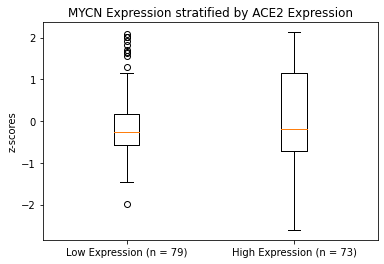

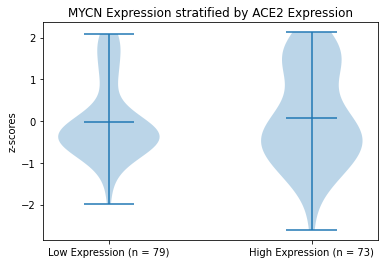

Low Expression: median = -0.2651, mean = -0.013582278481012667, 95% CI = (-0.21352196051508657, 0.1863574035530612)
High Expression: median = -0.1821, mean = 0.08441232876712329, 95% CI = (-0.1767528093169582, 0.3455774668512048)
Ttest_indResult(statistic=-0.5891595719906909, pvalue=0.5566404916451511)


In [7]:
#Split up data into low and high ACE2 expression groups, using z-scores of -0.5 and 0.5 as cutoffs, respectively
ACE2_groups = stratifyDataOnGeneExpression('ACE2',-0.5,0.5)
compareExpression('MYCN', ACE2_groups,'ACE2 Expression','Low Expression','High Expression')

### How does MYCN amplification compare between ACE2 overexpressing and underexpressing groups?

In [8]:
low_ACE2_samples = clinical_sample_trimmed.loc[clinical_sample_trimmed['Sample Identifier'].isin(ACE2_groups[0])]
low_ACE2_amplified_MYCN_count = sum(low_ACE2_samples['MYCN']=='Amplified')
low_ACE2_amplified_MYCN_prop = low_ACE2_amplified_MYCN_count/len(low_ACE2_samples)
print("Number of MYCN amplified tumors in low ACE2 expression group: " + str(low_ACE2_amplified_MYCN_count) + "/" + str(len(low_ACE2_samples)))
print("Proportion of MYCN amplified tumors in low ACE2 expression group: " + str(low_ACE2_amplified_MYCN_prop))

high_ACE2_samples = clinical_sample_trimmed.loc[clinical_sample_trimmed['Sample Identifier'].isin(ACE2_groups[1])]
high_ACE2_amplified_MYCN_count = sum(high_ACE2_samples['MYCN']=='Amplified')
high_ACE2_amplified_MYCN_prop = high_ACE2_amplified_MYCN_count/len(high_ACE2_samples)
print("Number of MYCN amplified tumors in high ACE2 expression group: " + str(high_ACE2_amplified_MYCN_count) + "/" + str(len(high_ACE2_samples)))
print("Proportion of MYCN amplified tumors in high ACE2 expression group: " + str(high_ACE2_amplified_MYCN_prop))



Number of MYCN amplified tumors in low ACE2 expression group: 16/79
Proportion of MYCN amplified tumors in low ACE2 expression group: 0.20253164556962025
Number of MYCN amplified tumors in high ACE2 expression group: 27/73
Proportion of MYCN amplified tumors in high ACE2 expression group: 0.3698630136986301


In [9]:
contingency_table = [[63,46],[16,27]]
stat, p, dof, expected = chi2_contingency(contingency_table)
print("p-value from Chi-Squared Test: " + str(p))

p-value from Chi-Squared Test: 0.0350181871783935


### Summary
Although the mean MYCN z-scores are not different between low and high ACE2 expression groups, the violin plots clearly show that the high ACE2 expression group has a much greater density of high MYCN expression.

Furthermore, MYCN amplification is much more common in tumors with high ACE2 expression (37% of high ACE2 tumors) than in tumors with low ACE2 expression (20% of low ACE2 tumors). This difference is significant, as validated by a Chi-Squared Test (p-value = 0.035).

These analyses strongly suggest that MYCN amplification/expression and ACE2 expression are biologically related to each other and affect neuroblastoma prognosis. This poses the following questions:
- Does ACE2 overexpression help induce MYCN amplification, and does ACE2 repression protect from MYCN amplification?

OR

- Does MYCN amplification stimulate ACE2 expression?

# Comparing EFS and OS based on ACE2 expression

Low expression: median EFS = 1297.0, mean EFS = 1760.6623376623377, 95% CI = (1411.85408764956, 2109.4705876751154)
High expression: median EFS = 663.0, mean EFS = 1329.5068493150684, 95% CI = (1035.567928128563, 1623.4457705015739)
Ttest_indResult(statistic=1.8429064264281916, pvalue=0.06734326763523273)


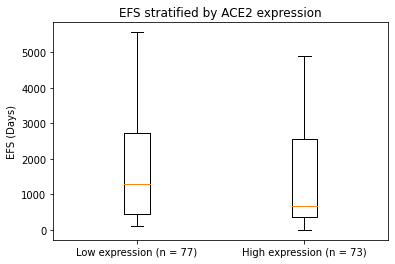

In [10]:
compareEFS(ACE2_groups, 'EFS stratified by ACE2 expression', 'Low expression', 'High expression')

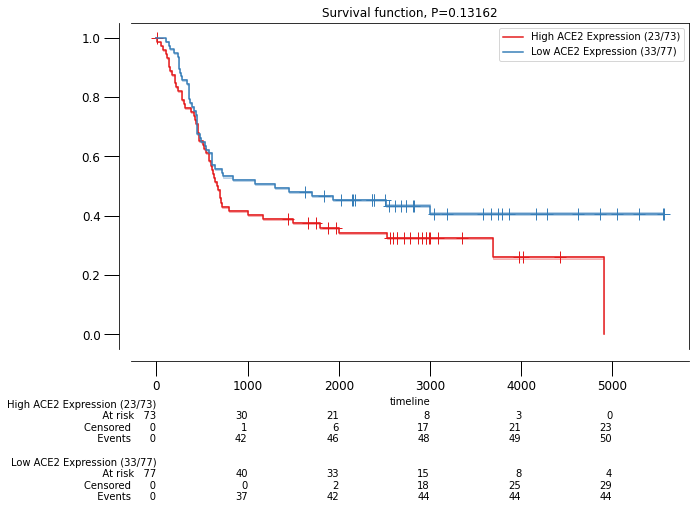

In [11]:
kaplanmeierEFS(ACE2_groups,'Low ACE2 Expression', 'High ACE2 Expression')

Low expression: median OS = 2052.0, mean OS = 1983.5584415584415, 95% CI = (1657.3816963035724, 2309.7351868133105)
High expression: median OS = 1446.0, mean OS = 1717.2191780821918, 95% CI = (1414.2349641562457, 2020.2033920081378)
Ttest_indResult(statistic=1.1694310179288758, pvalue=0.24410995315766104)


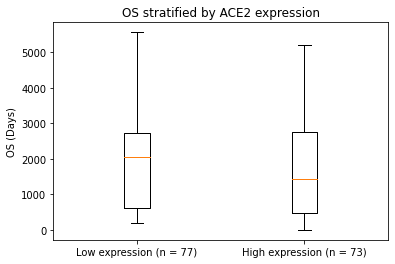

In [12]:
compareOS(ACE2_groups, 'OS stratified by ACE2 expression', 'Low expression', 'High expression')

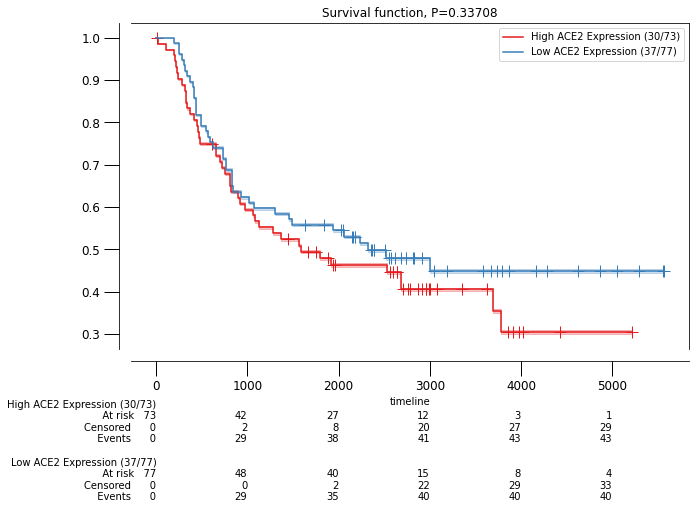

In [13]:
kaplanmeierOS(ACE2_groups,'Low ACE2 Expression', 'High ACE2 Expression')

### Summary
The low and high ACE2 expression groups have a difference in mean EFS time that is approaching significance (p-value = 0.067), with the high ACE2 group exhibiting a substantially lower mean and median EFS time. This is supported by the Kaplan Meier curve for EFS, which shows a clear differentiation between the curves for the low and high ACE2 expression groups that is approaching significance (p-value = 0.13).

The data for OS time shows the same trends; however, it is less significant.

# Comparing EFS based on both MYCN amplification status and ACE2 expression

In [14]:
#Stratify samples based on MYCN amplification status
MYCN_groups = stratifyCategoricalSampleData('MYCN', 'Not Amplified', 'Amplified')

### Comparing MYCN expression in MYCN nonamplified samples stratified by ACE2 expression

In [15]:
#Find z-scores for MYCN nonamplified samples
nonamplified_MYCN_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(MYCN_groups[0]).intersection(z_scores.columns))
nonamplified_MYCN_z_scores = z_scores[nonamplified_MYCN_columns]



In [20]:
#Obtain the ACE2 z-scores in nonamplified MYCN samples
ACE2_MYCN_nonamplified_z_scores = nonamplified_MYCN_z_scores.loc[nonamplified_MYCN_z_scores['Hugo_Symbol']=='ACE2'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_ACE2_MYCN_nonamplified_samples = ACE2_MYCN_nonamplified_z_scores.loc[ACE2_MYCN_nonamplified_z_scores.iloc[:,0] < -0.5].index
#Find samples for which the z-scores are > 0.5
high_ACE2_MYCN_nonamplified_samples = ACE2_MYCN_nonamplified_z_scores.loc[ACE2_MYCN_nonamplified_z_scores.iloc[:,0] > 0.5].index



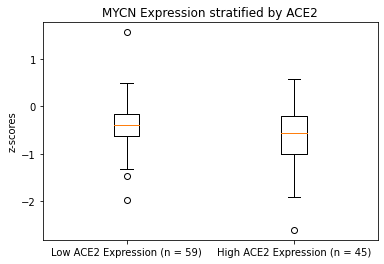

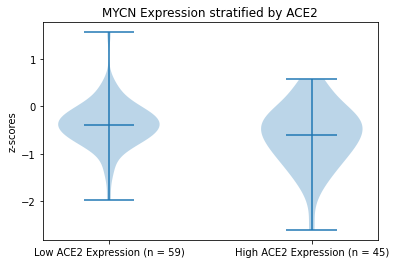

Low ACE2 Expression: median = -0.3888, mean = -0.3844440677966101, 95% CI = (-0.5142574285158451, -0.2546307070773751)
High ACE2 Expression: median = -0.5611, mean = -0.6144244444444444, 95% CI = (-0.8048036317241118, -0.42404525716477703)
Ttest_indResult(statistic=2.0217991139405225, pvalue=0.04581576602765235)


In [21]:
compareExpression('MYCN',[low_ACE2_MYCN_nonamplified_samples,high_ACE2_MYCN_nonamplified_samples],'ACE2','Low ACE2 Expression','High ACE2 Expression')



### Comparing EFS in MYCN nonamplified samples stratified by ACE2 expression

Low expression: median EFS = 1843.0, mean EFS = 1960.542372881356, 95% CI = (1541.4555869065111, 2379.629158856201)
High expression: median EFS = 632.0, mean EFS = 1366.5555555555557, 95% CI = (991.3838659376314, 1741.7272451734798)
Ttest_indResult(statistic=2.002951931315207, pvalue=0.04783563297256787)


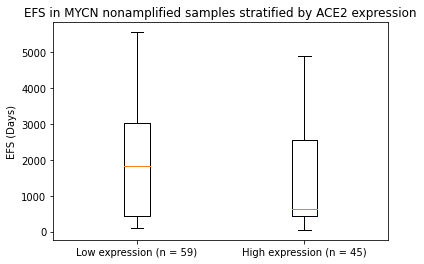

In [22]:
compareEFS([low_ACE2_MYCN_nonamplified_samples,high_ACE2_MYCN_nonamplified_samples], 'EFS in MYCN nonamplified samples stratified by ACE2 expression', 'Low expression', 'High expression')



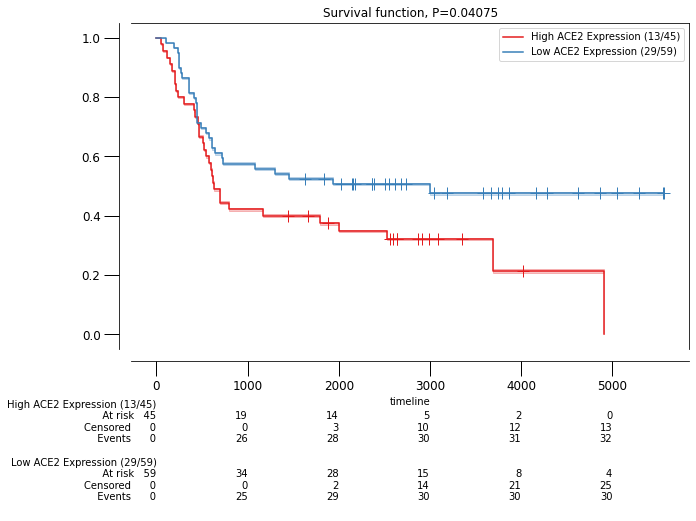

In [23]:
kaplanmeierEFS([low_ACE2_MYCN_nonamplified_samples,high_ACE2_MYCN_nonamplified_samples],'Low ACE2 Expression', 'High ACE2 Expression')

### Summary
In MYCN non-amplified samples, high ACE2 expression is significantly associated with lower MYCN expression (p = 0.046) and lower EFS time (p = 0.048). This is validated by the significant difference between the Kaplan Meier curves of MYCN non-amplified samples with low versus high ACE2 expression (p = 0.04). This suggests that in MYCN non-amplified samples, ACE2 is an important, previously uncharacterized biomarker for prognosis. Furthermore, the fact that ACE2 expression is negatively correlated with MYCN expression in MYCN non-amplified samples suggests that ACE2 might be involved in neuroblastoma progression in a manner independent from MYCN when MYCN is not amplified.

In the context of our project, this finding is significant because if high ACE2 expression correlates with worse EFS in otherwise good-prognosis MYCN non-amplified tumors, then the overexpression of ACE2 caused by SARS-CoV-2 could potentially worsen neuroblastoma outcomes in MYCN non-amplified patients.

### Comparing MYCN expression in MYCN amplified samples stratified by ACE2 expression

In [20]:
#Find z-scores for MYCN amplified samples
amplified_MYCN_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(MYCN_groups[1]).intersection(z_scores.columns))
amplified_MYCN_z_scores = z_scores[amplified_MYCN_columns]



In [21]:
#Obtain the ACE2 z-scores in amplified MYCN samples
ACE2_MYCN_amplified_z_scores = amplified_MYCN_z_scores.loc[amplified_MYCN_z_scores['Hugo_Symbol']=='ACE2'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_ACE2_MYCN_amplified_samples = ACE2_MYCN_amplified_z_scores.loc[ACE2_MYCN_amplified_z_scores.iloc[:,0] < -0.5].index
#Find samples for which the z-scores are > 0.5
high_ACE2_MYCN_amplified_samples = ACE2_MYCN_amplified_z_scores.loc[ACE2_MYCN_amplified_z_scores.iloc[:,0] > 0.5].index



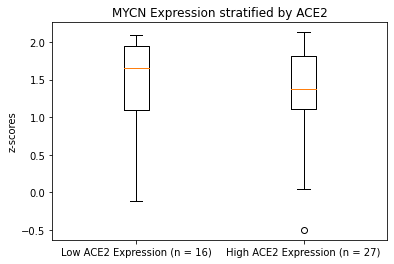

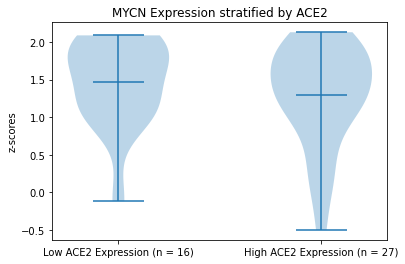

Low ACE2 Expression: median = 1.6511, mean = 1.4634999999999998, 95% CI = (1.1778227691834786, 1.749177230816521)
High ACE2 Expression: median = 1.3736, mean = 1.2947185185185188, 95% CI = (1.0427723182065405, 1.5466647188304972)
Ttest_indResult(statistic=0.8382672295078766, pvalue=0.40674121444952116)


In [22]:
compareExpression('MYCN',[low_ACE2_MYCN_amplified_samples,high_ACE2_MYCN_amplified_samples],'ACE2','Low ACE2 Expression','High ACE2 Expression')



### Comparing EFS in MYCN amplified samples stratified by ACE2 expression

Low expression: median EFS = 505.5, mean EFS = 1069.5625, 95% CI = (562.4551025927917, 1576.6698974072083)
High expression: median EFS = 663.0, mean EFS = 1205.851851851852, 95% CI = (724.1784014760924, 1687.5253022276115)
Ttest_indResult(statistic=-0.3617561268240588, pvalue=0.719392073197208)


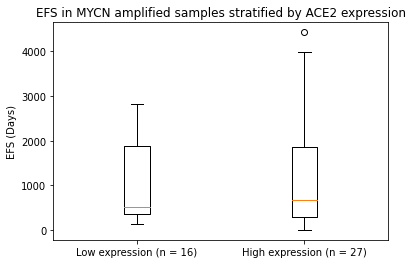

In [23]:
compareEFS([low_ACE2_MYCN_amplified_samples,high_ACE2_MYCN_amplified_samples], 'EFS in MYCN amplified samples stratified by ACE2 expression', 'Low expression', 'High expression')



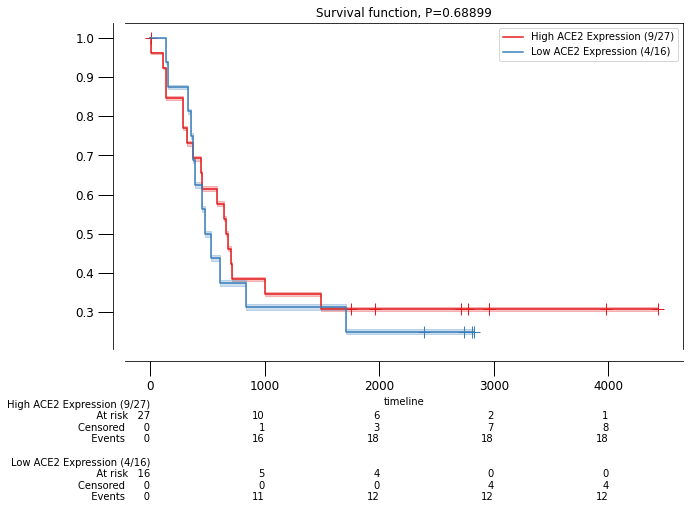

In [24]:
kaplanmeierEFS([low_ACE2_MYCN_amplified_samples,high_ACE2_MYCN_amplified_samples],'Low ACE2 Expression', 'High ACE2 Expression')




### Summary
There is no significant association between MYCN expression and ACE2 expression in MYCN amplified samples. Similarly, there is no significant association between EFS and ACE2 expression in MYCN amplified samples. However, this may be due to the low sample size of MYCN amplified samples.

### Comparing EFS in samples with high ACE2 expression, stratified by MYCN amplification status 

Not Amplified: median EFS = 632.0, mean EFS = 1366.5555555555557, 95% CI = (991.3838659376314, 1741.7272451734798)
Amplified: median EFS = 663.0, mean EFS = 1205.851851851852, 95% CI = (724.1784014760924, 1687.5253022276115)
Ttest_indResult(statistic=0.5151675781047067, pvalue=0.6080590101976306)


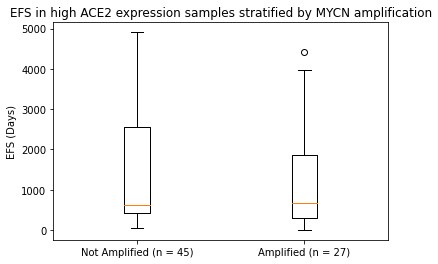

In [25]:
compareEFS([high_ACE2_MYCN_nonamplified_samples,high_ACE2_MYCN_amplified_samples], 'EFS in high ACE2 expression samples stratified by MYCN amplification', 'Not Amplified', 'Amplified')


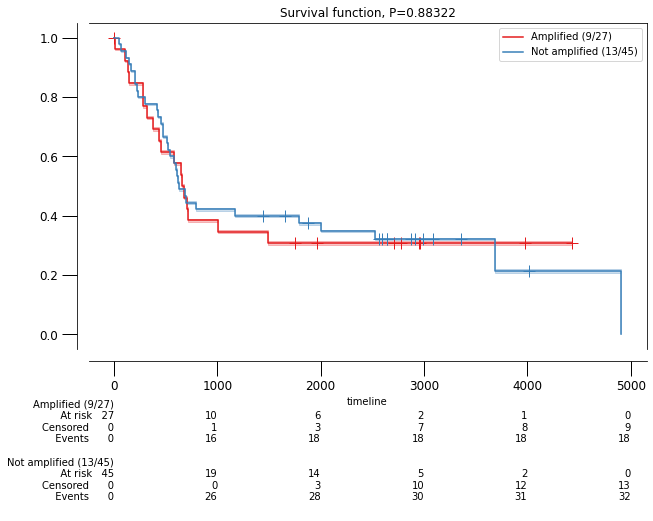

In [26]:
kaplanmeierEFS([high_ACE2_MYCN_nonamplified_samples,high_ACE2_MYCN_amplified_samples],'Not amplified', 'Amplified')


### Comparing EFS in samples with low ACE2 expression, stratified by MYCN amplification status 

Not Amplified: median EFS = 1843.0, mean EFS = 1960.542372881356, 95% CI = (1541.4555869065111, 2379.629158856201)
Amplified: median EFS = 505.5, mean EFS = 1069.5625, 95% CI = (562.4551025927917, 1576.6698974072083)
Ttest_indResult(statistic=2.0561856449659843, pvalue=0.04334036827731412)


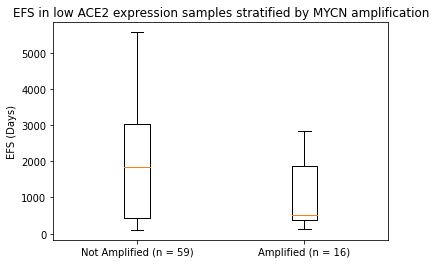

In [27]:
compareEFS([low_ACE2_MYCN_nonamplified_samples,low_ACE2_MYCN_amplified_samples], 'EFS in low ACE2 expression samples stratified by MYCN amplification', 'Not Amplified', 'Amplified')


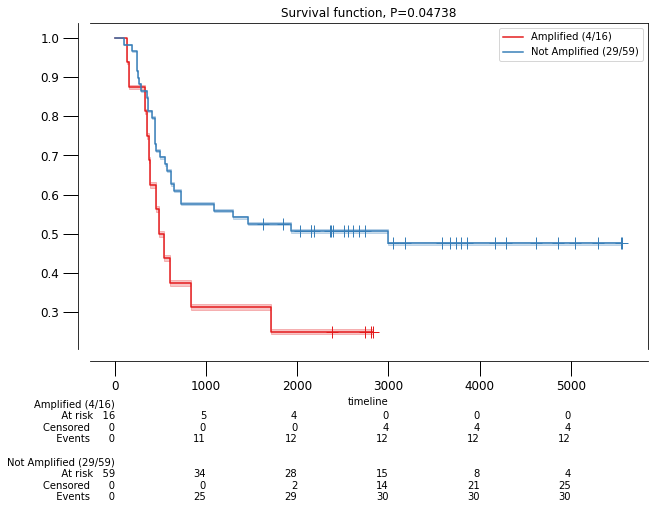

In [28]:
kaplanmeierEFS([low_ACE2_MYCN_nonamplified_samples,low_ACE2_MYCN_amplified_samples],'Not Amplified', 'Amplified')


### Comparing EFS between MYCN amplified samples and high ACE2 expression samples

MYCN Amplified: median EFS = 676.0, mean EFS = 1166.6666666666667, 95% CI = (1043.2785122649004, 1290.054821068433)
high ACE2 expression: median EFS = 663.0, mean EFS = 1329.5068493150684, 95% CI = (1035.567928128563, 1623.4457705015739)
Ttest_indResult(statistic=-1.1042214100318433, pvalue=0.27021275541154965)


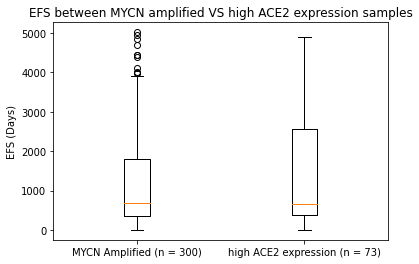

In [29]:
compareEFS([MYCN_groups[1],ACE2_groups[1]], 'EFS between MYCN amplified VS high ACE2 expression samples', 'MYCN Amplified', 'high ACE2 expression')


### Summary
Interestingly, MYCN amplification status differentiates survival groups in low ACE2 expression tumors, but not in high ACE2 expression tumors. This could imply that ACE2 expression and MYCN amplification are related because (1) MYCN amplification is unable to differentiate survival in high ACE2 expressing patients, and (2) ACE2 expression is unable to differentiate survival in MYCN amplified tumors. This could occur if ACE2 expression and MYCN amplification are in the same pathway and thus undifferentiable. Alternatively, this could suggest that ACE2 expression and MYCN amplification are such strong independent predictors of survival that it is impossible to differentiate further within the groups. The latter explanation is supported by the fact that MYCN amplified samples and high ACE2 expression samples have similar mean and median EFS times, and that (1) high ACE2 samples still have poor EFS times even in the absence of MYCN amplification and (2) MYCN amplified samples still have poor EFS times in the absence of high ACE2 expression. However, it is challenged by the direct correlation between ACE2 and MYCN expression (although this might be a result of both being independently common in poor prognosis tumors rather than the two expression levels being biologically related).

# Comparing EFS based on both Age at Diagnosis and ACE2 Expression

### Comparing EFS based on ACE2 Expression in >=18 month patients

In [30]:
#Stratify patients based on age at diagnosis
Age_groups = stratifyNumericalPatientData('Diagnosis Age (days)', 540) #540 days ~ 18 months

In [31]:
#Find z-scores for samples >=18 months
old_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(Age_groups[1]).intersection(z_scores.columns))
old_z_scores = z_scores[old_columns]

In [32]:
#Obtain the ACE2 z-scores in >=18 month samples
ACE2_old_z_scores = old_z_scores.loc[old_z_scores['Hugo_Symbol']=='ACE2'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_ACE2_old_samples = ACE2_old_z_scores.loc[ACE2_old_z_scores.iloc[:,0] < -0.5].index
#Find samples for which the z-scores are > 0.5
high_ACE2_old_samples = ACE2_old_z_scores.loc[ACE2_old_z_scores.iloc[:,0] > 0.5].index



Low expression: median EFS = 646.0, mean EFS = 1598.5820895522388, 95% CI = (1220.5817112673305, 1976.582467837147)
High expression: median EFS = 606.0, mean EFS = 1187.7692307692307, 95% CI = (879.8176911842015, 1495.72077035426)
Ttest_indResult(statistic=1.6459792498290262, pvalue=0.10218360513829818)


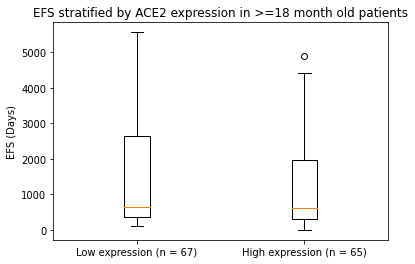

In [33]:
compareEFS([low_ACE2_old_samples,high_ACE2_old_samples], 'EFS stratified by ACE2 expression in >=18 month old patients', 'Low expression', 'High expression')




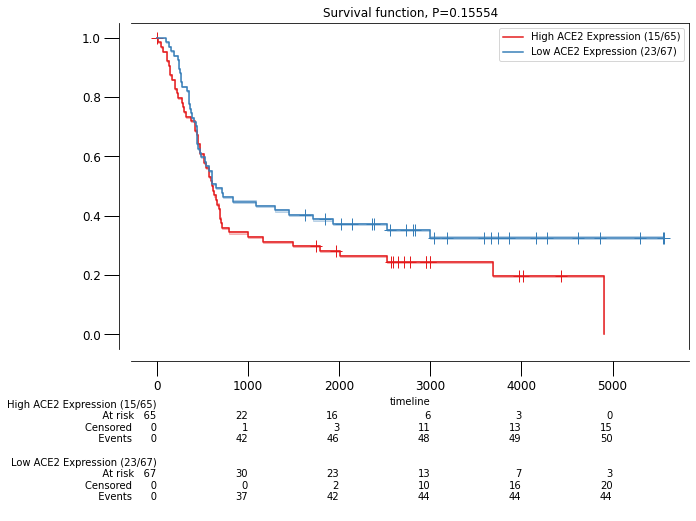

In [34]:
kaplanmeierEFS([low_ACE2_old_samples,high_ACE2_old_samples],'Low ACE2 Expression', 'High ACE2 Expression')




### Comparing EFS based on ACE2 Expression in <18 month patients

In [35]:
#Find z-scores for samples <18 months
young_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(Age_groups[0]).intersection(z_scores.columns))
young_z_scores = z_scores[young_columns]

In [36]:
#Obtain the ACE2 z-scores in <18 month samples
ACE2_young_z_scores = young_z_scores.loc[young_z_scores['Hugo_Symbol']=='ACE2'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_ACE2_young_samples = ACE2_young_z_scores.loc[ACE2_young_z_scores.iloc[:,0] < -0.5].index
#Find samples for which the z-scores are > 0.5
high_ACE2_young_samples = ACE2_young_z_scores.loc[ACE2_young_z_scores.iloc[:,0] > 0.5].index



Low expression: median EFS = 2561.5, mean EFS = 2846.6, 95% CI = (2287.831626779751, 3405.368373220249)
High expression: median EFS = 2755.0, mean EFS = 2481.125, 95% CI = (1984.07198417444, 2978.1780158255597)
Ttest_indResult(statistic=0.9327899890261991, pvalue=0.36479199088589453)


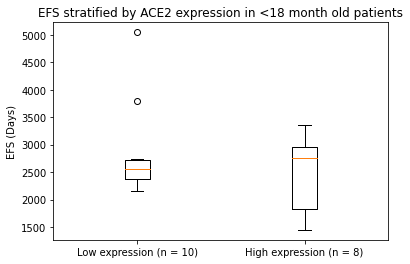

In [37]:
compareEFS([low_ACE2_young_samples,high_ACE2_young_samples], 'EFS stratified by ACE2 expression in <18 month old patients', 'Low expression', 'High expression')




### Summary

High ACE2 expression appears to be correlated with lower EFS in >=18 month patients, but it does not significantly stratify between survival groups. Similarly ACE2 expressoin does not stratify between survival groups in patients <18 months, however the small number of <18 month patients makes this analysis unreliable.

It makes sense that the results for the >=18 month group look very similar to the results for all samples, since most microarray samples are >=18 months.

# Comparing ACE2 expression between risk groups

In [38]:
#Stratify patients based on risk groups
low_risk_patients = clinical_patient_trimmed.loc[clinical_patient_trimmed['Risk Group']=='Low Risk']['#Patient Identifier']
intermediate_risk_patients = clinical_patient_trimmed.loc[clinical_patient_trimmed['Risk Group']=='Intermediate Risk']['#Patient Identifier']
high_risk_patients = clinical_patient_trimmed.loc[clinical_patient_trimmed['Risk Group']=='High Risk']['#Patient Identifier']




In [39]:
#Stratify samples based on patients in each risk group
low_risk_samples = clinical_sample_trimmed.loc[clinical_sample_trimmed['#Patient Identifier'].isin(low_risk_patients)]['Sample Identifier']
intermediate_risk_samples = clinical_sample_trimmed.loc[clinical_sample_trimmed['#Patient Identifier'].isin(intermediate_risk_patients)]['Sample Identifier']
high_risk_samples = clinical_sample_trimmed.loc[clinical_sample_trimmed['#Patient Identifier'].isin(high_risk_patients)]['Sample Identifier']




In [40]:
#Print the number of samples in each risk group that have microarray data
print("Number of microarray samples in each group:")
print("Low Risk: " + str(len(list(set(low_risk_samples).intersection(z_scores.columns)))))
print("Intermediate Risk: " + str(len(list(set(intermediate_risk_samples).intersection(z_scores.columns)))))
print("High Risk: " + str(len(list(set(high_risk_samples).intersection(z_scores.columns)))))

Number of microarray samples in each group:
Low Risk: 30
Intermediate Risk: 0
High Risk: 217


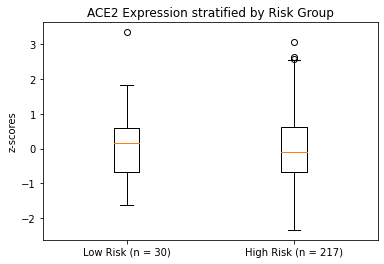

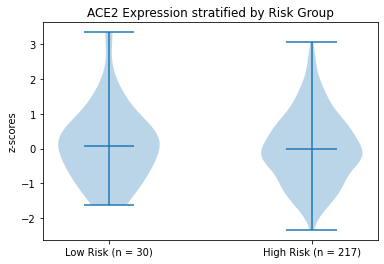

Low Risk: median = 0.16645, mean = 0.08536, 95% CI = (-0.29355132158505076, 0.46427132158505074)
High Risk: median = -0.0919, mean = -0.0032894009216589983, 95% CI = (-0.1358407523671243, 0.12926195052380632)
Ttest_indResult(statistic=0.45335997464941896, pvalue=0.6506908271627303)


In [41]:
#Since the intermediate risk group has no microarray samples, conduct expression analysis between
#low and high risk groups
compareExpression('ACE2',[low_risk_samples,high_risk_samples],'Risk Group','Low Risk','High Risk')

# Comparing EFS within each risk group stratified by ACE2 expression

### EFS of high risk samples stratified by ACE2 expression

In [42]:
#Find z-scores for high risk samples
high_risk_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(high_risk_samples).intersection(z_scores.columns))
high_risk_z_scores = z_scores[high_risk_columns]



In [43]:
#Obtain the ACE2 z-scores in high risk samples
ACE2_high_risk_z_scores = high_risk_z_scores.loc[high_risk_z_scores['Hugo_Symbol']=='ACE2'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_ACE2_high_risk_samples = ACE2_high_risk_z_scores.loc[ACE2_high_risk_z_scores.iloc[:,0] < -0.5].index
#Find samples for which the z-scores are > 0.5
high_ACE2_high_risk_samples = ACE2_high_risk_z_scores.loc[ACE2_high_risk_z_scores.iloc[:,0] > 0.5].index



Low expression: median EFS = 646.0, mean EFS = 1584.6716417910447, 95% CI = (1210.145066728687, 1959.1982168534025)
High expression: median EFS = 606.0, mean EFS = 1187.7692307692307, 95% CI = (879.8176911842015, 1495.72077035426)
Ttest_indResult(statistic=1.5992768994497861, pvalue=0.11218670372091882)


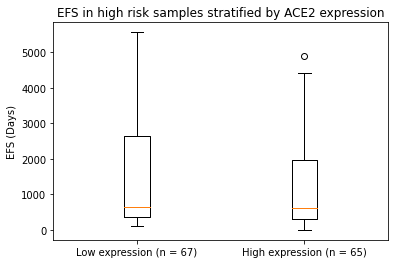

In [44]:
compareEFS([low_ACE2_high_risk_samples,high_ACE2_high_risk_samples], 'EFS in high risk samples stratified by ACE2 expression', 'Low expression', 'High expression')



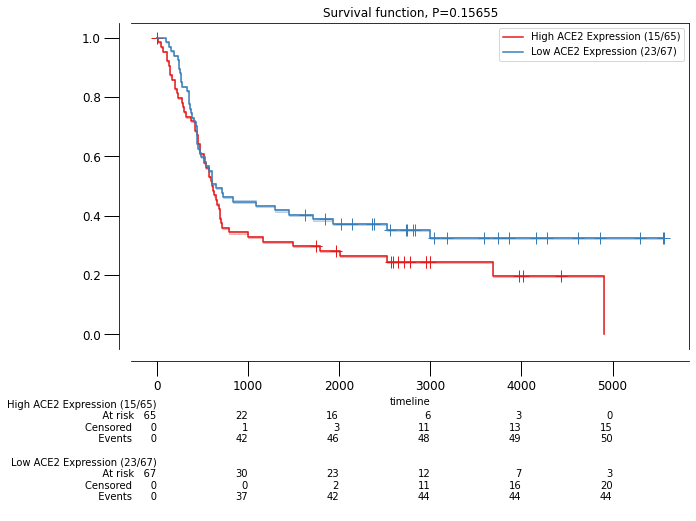

In [45]:
kaplanmeierEFS([low_ACE2_high_risk_samples,high_ACE2_high_risk_samples],'Low ACE2 Expression', 'High ACE2 Expression')



### EFS of low-risk samples stratified by ACE2 expression

In [46]:
#Find z-scores for low risk samples
low_risk_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(low_risk_samples).intersection(z_scores.columns))
low_risk_z_scores = z_scores[low_risk_columns]



In [47]:
#Obtain the ACE2 z-scores in low risk samples
ACE2_low_risk_z_scores = low_risk_z_scores.loc[low_risk_z_scores['Hugo_Symbol']=='ACE2'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_ACE2_low_risk_samples = ACE2_low_risk_z_scores.loc[ACE2_low_risk_z_scores.iloc[:,0] < -0.5].index
#Find samples for which the z-scores are > 0.5
high_ACE2_low_risk_samples = ACE2_low_risk_z_scores.loc[ACE2_low_risk_z_scores.iloc[:,0] > 0.5].index



Low expression: median EFS = 2561.5, mean EFS = 2939.8, 95% CI = (2359.189340159526, 3520.410659840474)
High expression: median EFS = 2755.0, mean EFS = 2481.125, 95% CI = (1984.07198417444, 2978.1780158255597)
Ttest_indResult(statistic=1.1405975275473423, pvalue=0.2708235079627593)


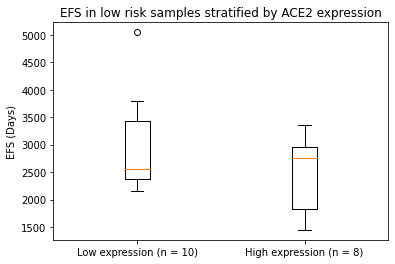

In [48]:
compareEFS([low_ACE2_low_risk_samples,high_ACE2_low_risk_samples], 'EFS in low risk samples stratified by ACE2 expression', 'Low expression', 'High expression')



### Summary
High ACE2 expression appears to be associated with lower EFS even in high risk samples with p-values approaching signifiance (T-test comparison of means p-value = 0.112, Kaplan Meier log-rank test p-value = 0.157). This suggests that ACE2 may serve as an important prognostic marker that can help more accurately stratify neuroblastoma patients than current risk group stratification methods; however, ACE2 expression alone is not enough to significantly stratify survival groups in high risk samples.

Possible next step: Create ACE2 expression profiles and see if those better stratify survival groups.

In low risk samples, there is no significant association between ACE2 expression and EFS; however, the number of low risk samples was very low and thus statistical analyses may be unreliable.

It makes sense that the results for the high group look very similar to the results for all samples, since most microarray samples are high risk.

# Compare ACE2 expression between sex

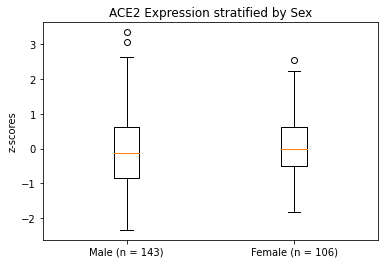

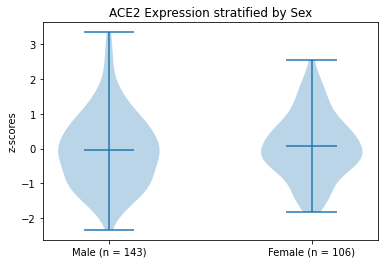

Male: median = -0.1177, mean = -0.04856433566433567, 95% CI = (-0.22178519702425753, 0.12465652569558618)
Female: median = -0.02045, mean = 0.06551415094339624, 95% CI = (-0.11033970069836613, 0.24136800258515861)
Ttest_indResult(statistic=-0.8879028481070342, pvalue=0.3754568073878187)


In [50]:
#Stratify patients based on sex
male_patients = clinical_patient_trimmed.loc[clinical_patient_trimmed['Sex']=='Male']['#Patient Identifier']
female_patients = clinical_patient_trimmed.loc[clinical_patient_trimmed['Sex']=='Female']['#Patient Identifier']


#Stratify samples based on patients in each risk group
male_samples = clinical_sample_trimmed.loc[clinical_sample_trimmed['#Patient Identifier'].isin(male_patients)]['Sample Identifier']
female_samples = clinical_sample_trimmed.loc[clinical_sample_trimmed['#Patient Identifier'].isin(female_patients)]['Sample Identifier']


compareExpression('ACE2',[male_samples,female_samples],'Sex','Male','Female')